In [17]:
import math
import numpy as np

mu1=[1 ,0]
mu2=[-1 ,0]
mu3=[0 ,-10]

u=[[1/math.sqrt(2), -1/math.sqrt(2)],[1/math.sqrt(2), 1/math.sqrt(2)]]
lamda1=[[4, 0],[0, 1]]
lamda2=[[1,0],[0,5]]
covariance_matrix1=np.matmul(u,np.matmul(lamda1,np.transpose(u)))
covariance_matrix2=np.matmul(u,np.matmul(lamda2,np.transpose(u)))
covariance_matrix3=np.eye(2)

In [18]:
red=np.random.multivariate_normal(mu1,covariance_matrix1,1000)
green=np.random.multivariate_normal(mu2,covariance_matrix2,1000)
blue=np.random.multivariate_normal(mu3,covariance_matrix3,1000)

In [19]:
print(red.shape)
print(red[:,0].shape)

(1000, 2)
(1000,)


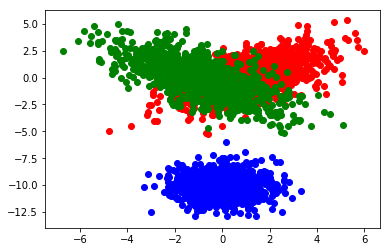

In [20]:
from matplotlib import pyplot as plt
plt.scatter(red[:,0],red[:,1],color='red')
plt.scatter(green[:,0],green[:,1],color='green')
plt.scatter(blue[:,0],blue[:,1],color='blue')

K-Means Clustering


In [21]:
all1=np.concatenate((red,green),axis=0)
all_data=np.concatenate((all1,blue),axis=0)

label1=np.repeat(1, 1000)
label2=np.repeat(2, 1000)
label3=np.repeat(3, 1000)
cluster_number=np.concatenate((label1,label2),axis=0)
cluster_number=np.concatenate((cluster_number,label3),axis=0)
np.random.shuffle(cluster_number) #random cluster assignments

#first iteration of k-means
centroid1x=0
centroid1y=0
centroid2x=0
centroid2y=0
centroid3x=0
centroid3y=0

for q in range (3000): 
    if (cluster_number[q]==1):
        centroid1x=all_data[q,0]+centroid1x
        centroid1y=all_data[q,1]+centroid1y
    if (cluster_number[q]==2):
        centroid2x=all_data[q,0]+centroid2x
        centroid2y=all_data[q,1]+centroid2y
    if (cluster_number[q]==3):
        centroid3x=all_data[q,0]+centroid3x
        centroid3y=all_data[q,1]+centroid3y

centroid1x=centroid1x/1000
centroid1y=centroid1y/1000
centroid2x=centroid2x/1000
centroid2y=centroid2y/1000
centroid3x=centroid3x/1000
centroid3y=centroid3y/1000

dist_centroid1=np.zeros(3000)
dist_centroid2=np.zeros(3000)
dist_centroid3=np.zeros(3000)

for a in range (3000):
    dist_centroid1[a] = math.sqrt( (all_data[a,0] - centroid1x)**2 + ((all_data[a,1] - centroid1y)**2 ))
    dist_centroid2[a] = math.sqrt( (all_data[a,0] - centroid2x)**2 + ((all_data[a,1] - centroid2y)**2 ))
    dist_centroid3[a] = math.sqrt( (all_data[a,0] - centroid3x)**2 + ((all_data[a,1] - centroid3y)**2 ))

v=np.vstack((dist_centroid1,dist_centroid2))
dist_all_centroids=np.vstack((v,dist_centroid3))
new_clusters=np.argmin(dist_all_centroids, axis=0)
new_clusters=new_clusters+np.ones(3000)
    
while not(np.array_equal(cluster_number,new_clusters)): #iterate until no change in clusters
    cluster_number=new_clusters
    #print(not(np.array_equal(cluster_number,new_clusters)))
    centroid1x=0
    centroid1y=0
    centroid2x=0
    centroid2y=0
    centroid3x=0
    centroid3y=0

    for q in range (3000): 
        if (cluster_number[q]==1):
            centroid1x=all_data[q,0]+centroid1x
            centroid1y=all_data[q,1]+centroid1y
        if (cluster_number[q]==2):
            centroid2x=all_data[q,0]+centroid2x
            centroid2y=all_data[q,1]+centroid2y
        if (cluster_number[q]==3):
            centroid3x=all_data[q,0]+centroid3x
            centroid3y=all_data[q,1]+centroid3y

    centroid1x=centroid1x/1000
    centroid1y=centroid1y/1000
    centroid2x=centroid2x/1000
    centroid2y=centroid2y/1000
    centroid3x=centroid3x/1000
    centroid3y=centroid3y/1000

    dist_centroid1=np.zeros(3000)
    dist_centroid2=np.zeros(3000)
    dist_centroid3=np.zeros(3000)
    for a in range (3000):
        dist_centroid1[a] = math.sqrt( (all_data[a,0] - centroid1x)**2 + ((all_data[a,1] - centroid1y)**2 ))
        dist_centroid2[a] = math.sqrt( (all_data[a,0] - centroid2x)**2 + ((all_data[a,1] - centroid2y)**2 ))
        dist_centroid3[a] = math.sqrt( (all_data[a,0] - centroid3x)**2 + ((all_data[a,1] - centroid3y)**2 ))

    v=np.vstack((dist_centroid1,dist_centroid2))
    dist_all_centroids=np.vstack((v,dist_centroid3))
    new_clusters=np.argmin(dist_all_centroids, axis=0)
    new_clusters=new_clusters+np.ones(3000)
    
    

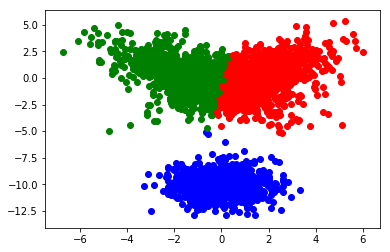

In [22]:
from matplotlib import pyplot as plt
for q in range (3000): 
        if (cluster_number[q]==1):
            plt.scatter(all_data[q,0],all_data[q,1],color= 'green')
        if (cluster_number[q]==2):
            plt.scatter(all_data[q,0],all_data[q,1],color= 'blue')
        if (cluster_number[q]==3):
            plt.scatter(all_data[q,0],all_data[q,1],color= 'red')